# <font color=red>K-Means Clustering (Unsupervised Learning)</font>

* K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.

### Where we use the K-Means Clustering

* Customer Segmentation
* Player Analysis (Sports)
* Search engines
* Search engines:
When a search is performed, the search results need to be grouped,and the search engines very often use clustering to do this. 
* Wireless network sensor
* Academic performance 
* Diagnostic systems 

### How does work the algorithm ?

1. Select the number K to decide the number of clusters.(K is number of centroids)
2. Initialize centroids by shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Compute the sum of the squared distance between data points and all centroids.
4. Assign each data point to the closest cluster (centroid).
5. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
6. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

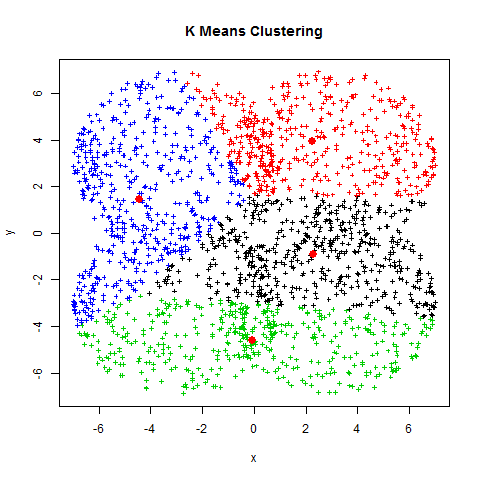

### How to choose K number of clusters ? (Elbow Method)

* The Elbow method is one of the most popular ways to find the optimal number of clusters.
* If we find the optimal number of clusters,we can get the best performance from the model.
* Elbow Method uses the WCSS(Within Clusters Sum of Squares)

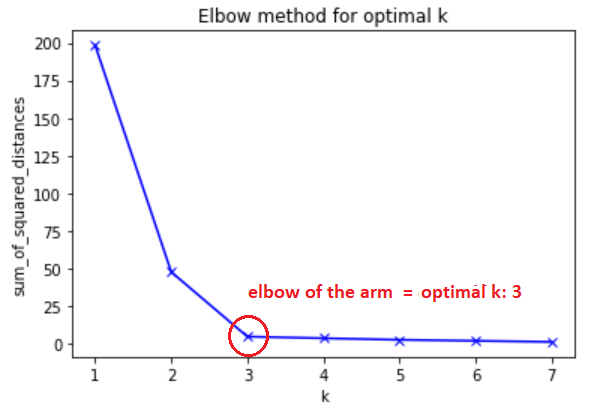

* The sharp point looks like an arm , this point can be considered as the optimal value of K.

In [1]:
import mglearn

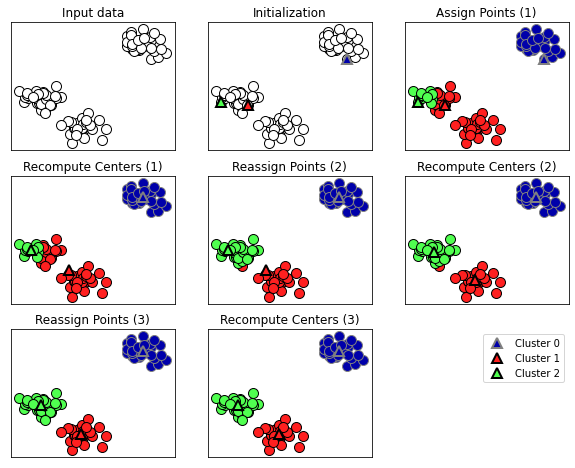

In [2]:
mglearn.plots.plot_kmeans_algorithm()

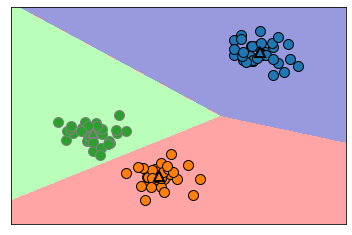

In [3]:
mglearn.plots.plot_kmeans_boundaries()

## <font color="blue">Application of K-Means on Dataset</font>

In [4]:
#Import the libraries that we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

from warnings import filterwarnings
filterwarnings("ignore")


In [5]:
df=pd.read_csv("spotify.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Data Investigation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [7]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
colorscale = [[0, 'red'],[.5, 'white'],[1, '#ffffff']]
table=ff.create_table(df.describe(),height_constant=30,colorscale=colorscale)
table.layout.width=2400
py.iplot(table)


In [9]:
df.shape

(2017, 17)

### Checking the null values

In [10]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [11]:
df.isnull().sum().any()

False

## Dropping the unneccessary columns

In [12]:
df=df.drop(["Unnamed: 0","target","time_signature","mode","key"],axis=1)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,Parallel Lines,Junior Boys


### Data Visualization

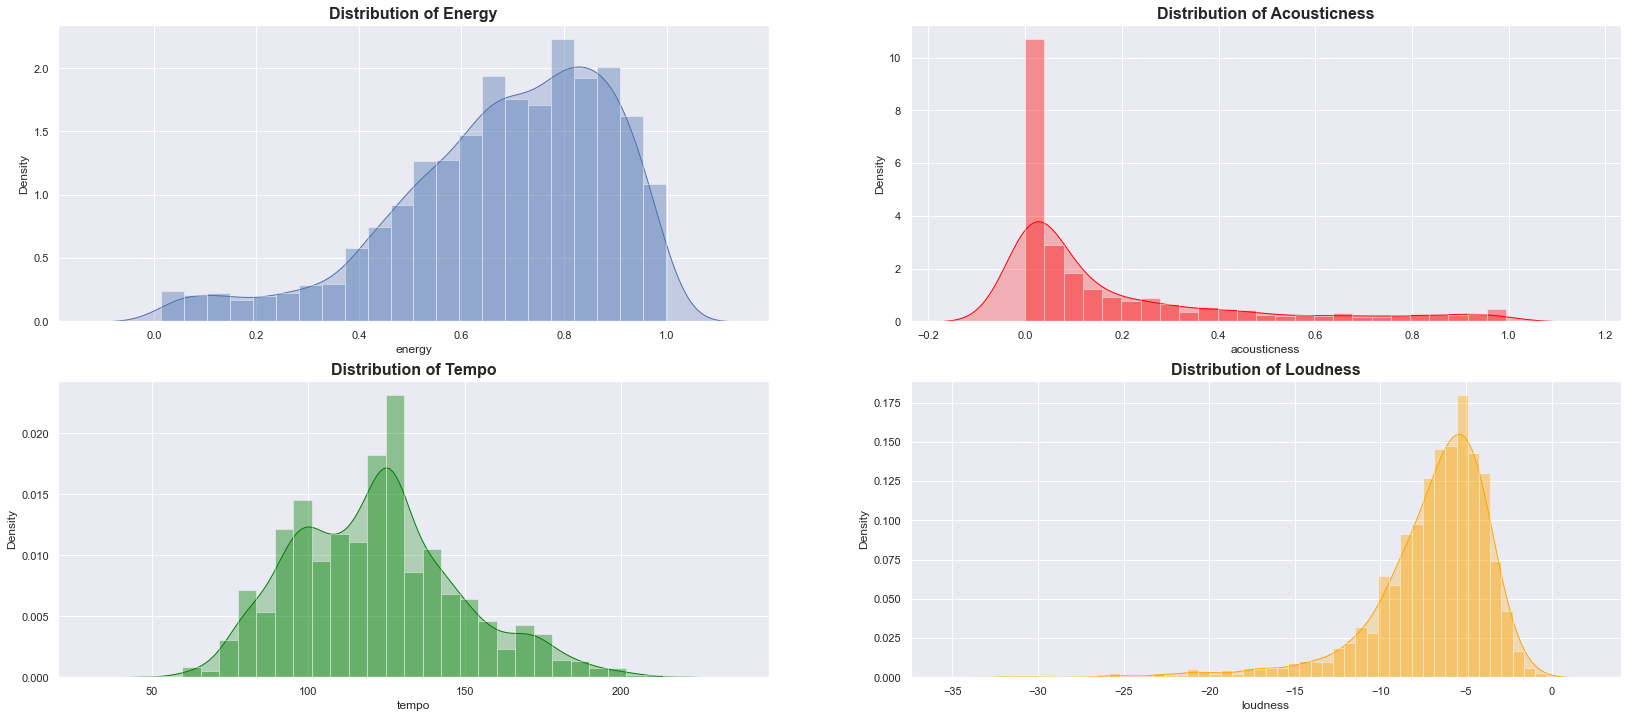

In [13]:
plt.figure(figsize=(28,12))

plt.subplot(2,2,1)
sns.distplot(df["energy"],kde_kws={"shade":True});
plt.title("Distribution of Energy",fontsize=16,fontweight="bold");

plt.subplot(2,2,2)
sns.distplot(df["acousticness"],kde_kws={"shade":True},color="red");
plt.title("Distribution of Acousticness",fontsize=16,fontweight="bold");

plt.subplot(2,2,3)
sns.distplot(df["tempo"],kde_kws={"shade":True},color="green");
plt.title("Distribution of Tempo",fontsize=16,fontweight="bold");

plt.subplot(2,2,4)
sns.distplot(df["loudness"],kde_kws={"shade":True},color="orange");
plt.title("Distribution of Loudness",fontsize=16,fontweight="bold");




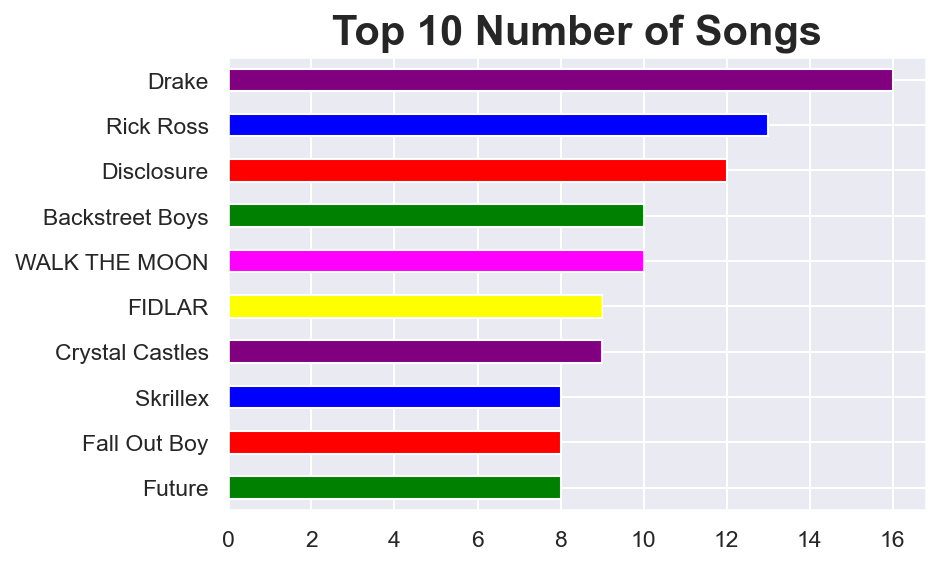

In [14]:
plt.figure(dpi=150);
palette=["green","red","blue","purple","yellow","magenta"]
df.artist.value_counts()[:10].sort_values().plot.barh(color=palette);
plt.title("Top 10 Number of Songs",fontsize=20,fontweight="bold");

In [15]:
df.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.117126,-0.562021,-0.099893,-0.127596,-0.152227
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,-0.132044,0.104362,0.142661,-0.143538,0.442061
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023203,-0.273798,-0.079562,-0.076469,-0.120030
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.217435,0.762177,0.093102,0.165721,0.278383
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,0.001063,-0.354625,-0.155349,0.000347,-0.194630
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,1.000000,0.156648,0.092403,0.010558,-0.053011
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.156648,1.000000,0.088844,0.156418,0.204968
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.092403,0.088844,1.000000,0.111359,0.054419
tempo,-0.127596,-0.143538,-0.076469,0.165721,0.000347,0.010558,0.156418,0.111359,1.000000,-0.014965
valence,-0.152227,0.442061,-0.120030,0.278383,-0.194630,-0.053011,0.204968,0.054419,-0.014965,1.000000


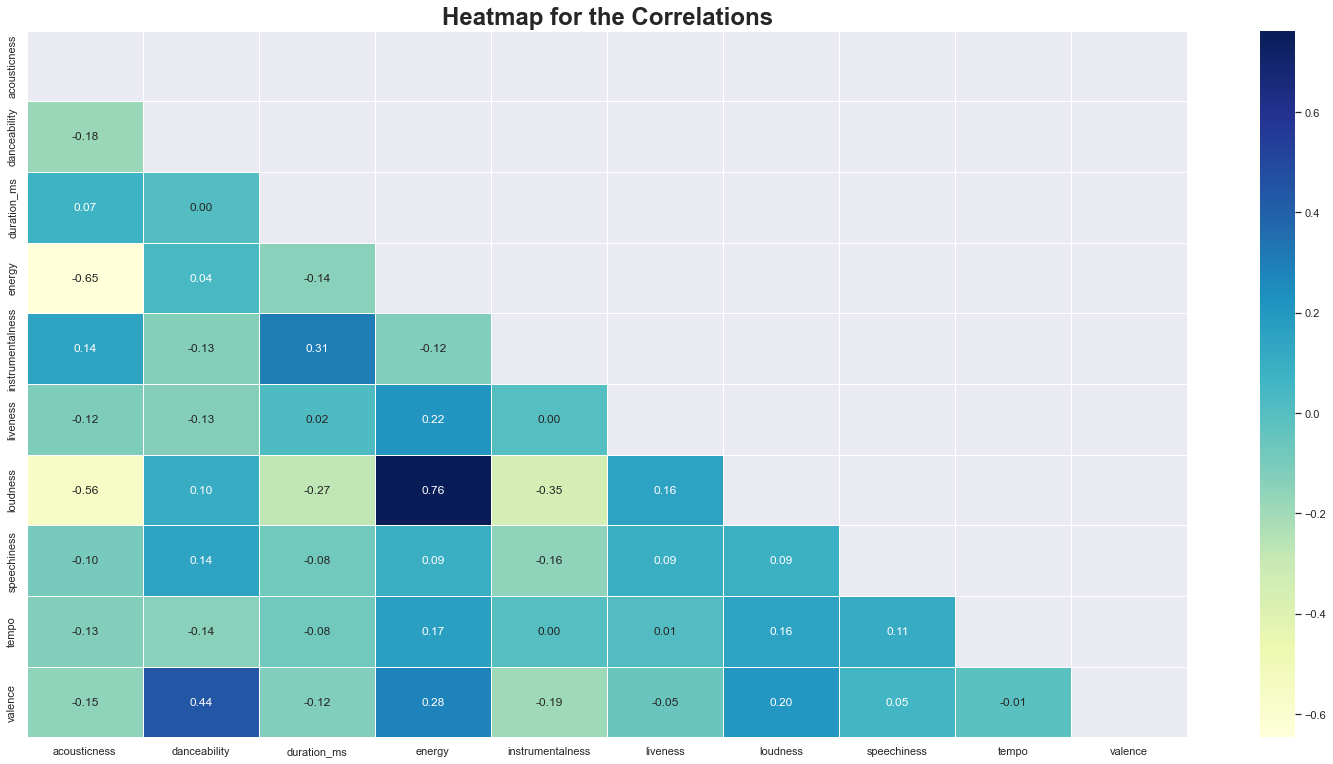

In [16]:
mask=np.triu(np.ones_like(df.corr()));
plt.figure(figsize=(26,13));
sns.heatmap(df.corr(),mask=mask,annot=True,fmt=".2f",cmap="YlGnBu",linewidths=1);
plt.title("Heatmap for the Correlations",fontsize=24,fontweight="bold");

In [17]:
top_10_corr=df.corr().unstack().sort_values(ascending=False).drop_duplicates()[1:11]
top_10_corr

loudness          energy              0.762177
valence           danceability        0.442061
instrumentalness  duration_ms         0.305403
valence           energy              0.278383
liveness          energy              0.217435
loudness          valence             0.204968
tempo             energy              0.165721
liveness          loudness            0.156648
tempo             loudness            0.156418
acousticness      instrumentalness    0.144397
dtype: float64

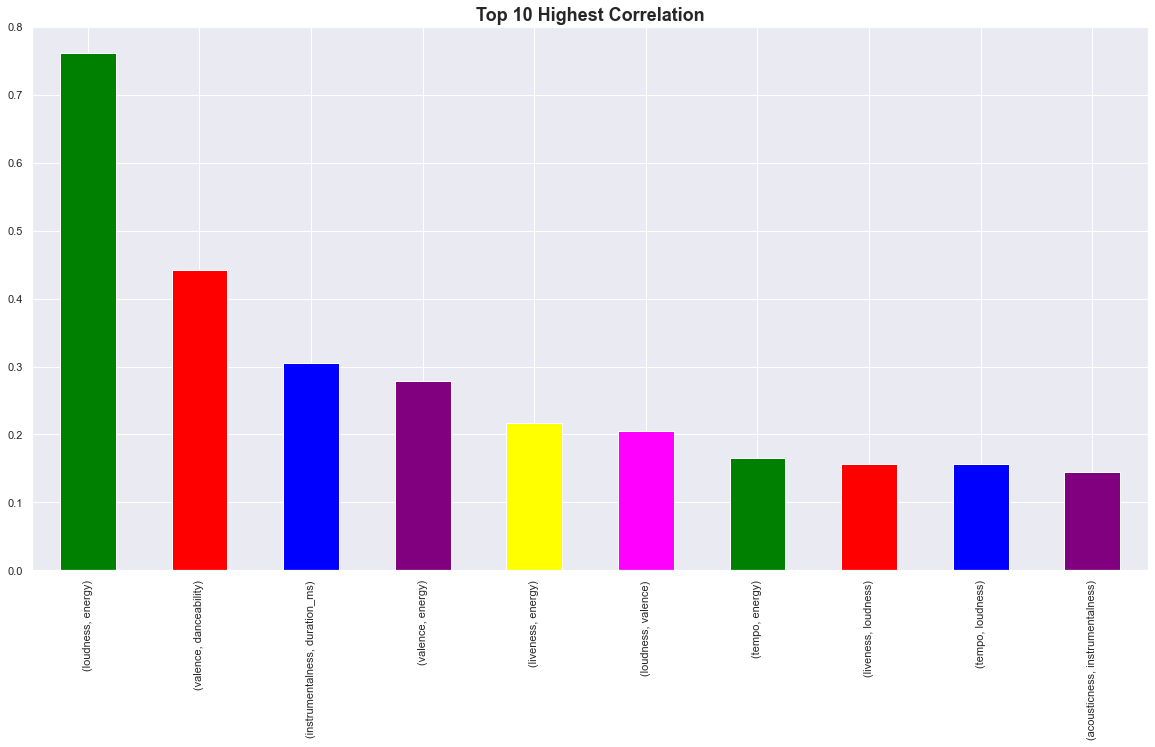

In [18]:
plt.figure(figsize=(20,10));
palette=["green","red","blue","purple","yellow","magenta"];
top_10_corr.plot.bar(color=palette);
plt.title("Top 10 Highest Correlation",fontsize=18,fontweight="bold");

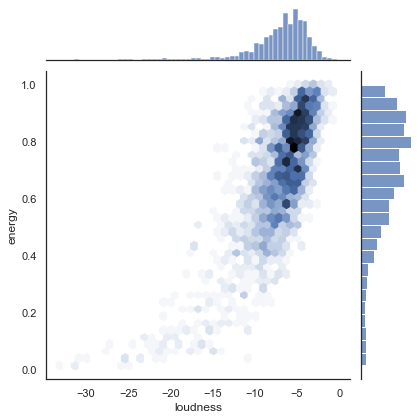

In [19]:
with sns.axes_style("white"):
    sns.jointplot(df.loudness,df.energy,kind="hex");
    

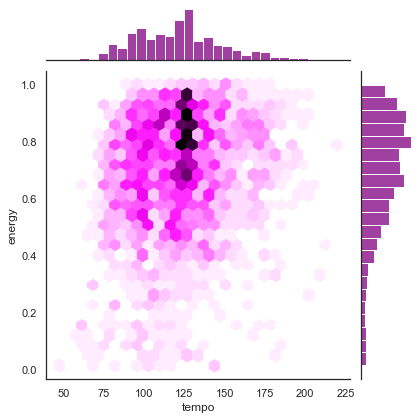

In [20]:
with sns.axes_style("white"):
    sns.jointplot(df.tempo,df.energy,kind="hex",color="purple");

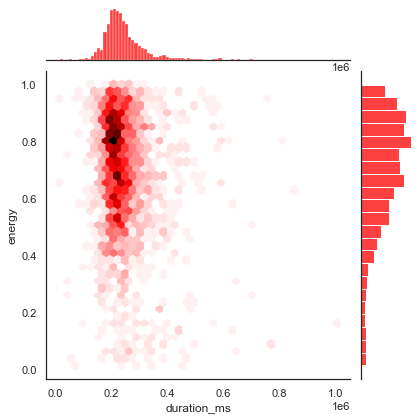

In [21]:
with sns.axes_style("white"):
    sns.jointplot(df.duration_ms,df.energy,kind="hex",color="red");

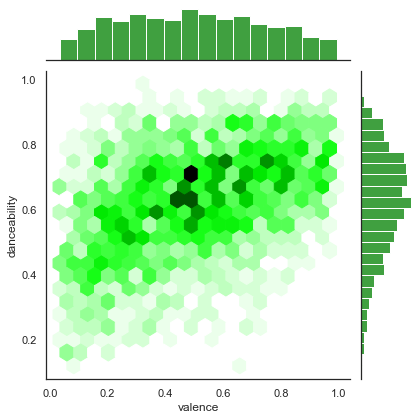

In [22]:
with sns.axes_style("white"):
    sns.jointplot(df.valence,df.danceability,kind="hex",color="green");

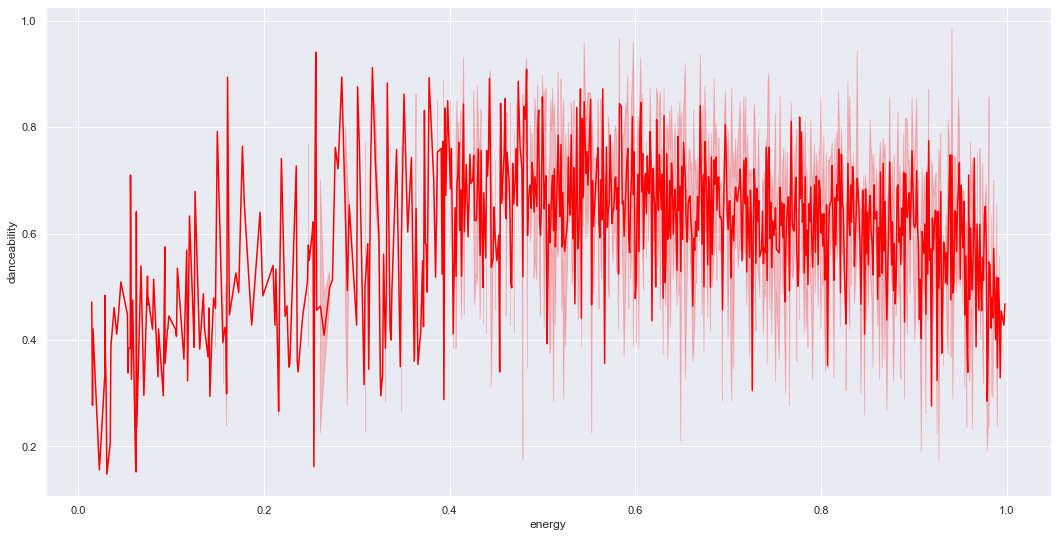

In [23]:
plt.figure(figsize=(18,9));
sns.lineplot(df.energy,df.danceability,color="red");

In [24]:
#Top 10 songs that have the most tempo
top_10_tempo_index=df["tempo"].sort_values(ascending=False).index.to_list()[:10]
top_10_tempo=df.iloc[top_10_tempo_index,:]
top_10_tempo

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist
412,0.010600,0.346,301867,0.808,0.685000,0.2470,-5.791,0.0302,219.331,0.711,Lazuli,Beach House
124,0.674000,0.462,226333,0.449,0.000632,0.0993,-9.271,0.0916,209.686,0.748,Danger and Dread,Brown Bird
718,0.717000,0.345,237973,0.313,0.000822,0.1000,-10.098,0.0681,207.969,0.166,Hannah Hunt,Vampire Weekend
1960,0.537000,0.191,184800,0.664,0.000001,0.3530,-4.125,0.0456,203.822,0.545,Puppy Love,Donny Osmond
1711,0.101000,0.403,201720,0.883,0.000000,0.1090,-3.385,0.0870,202.013,0.769,Amazing,Big Time Rush
809,0.615000,0.508,174067,0.247,0.035200,0.1660,-15.432,0.0748,200.749,0.484,Tupelo - Part 1,Pop Staples
826,0.016900,0.374,293851,0.853,0.000027,0.3220,-3.571,0.2950,200.035,0.422,Living Every Dream,Antwon
1339,0.000019,0.209,246689,0.955,0.011800,0.0925,-4.527,0.1430,199.988,0.114,The Shaping Sickness,Shadow of Intent
102,0.247000,0.525,292760,0.643,0.000000,0.1060,-6.874,0.8160,199.727,0.943,Willing & Able,Disclosure
1802,0.036800,0.277,244413,0.604,0.000000,0.3650,-3.778,0.0620,199.519,0.280,Mad Love.,JoJo


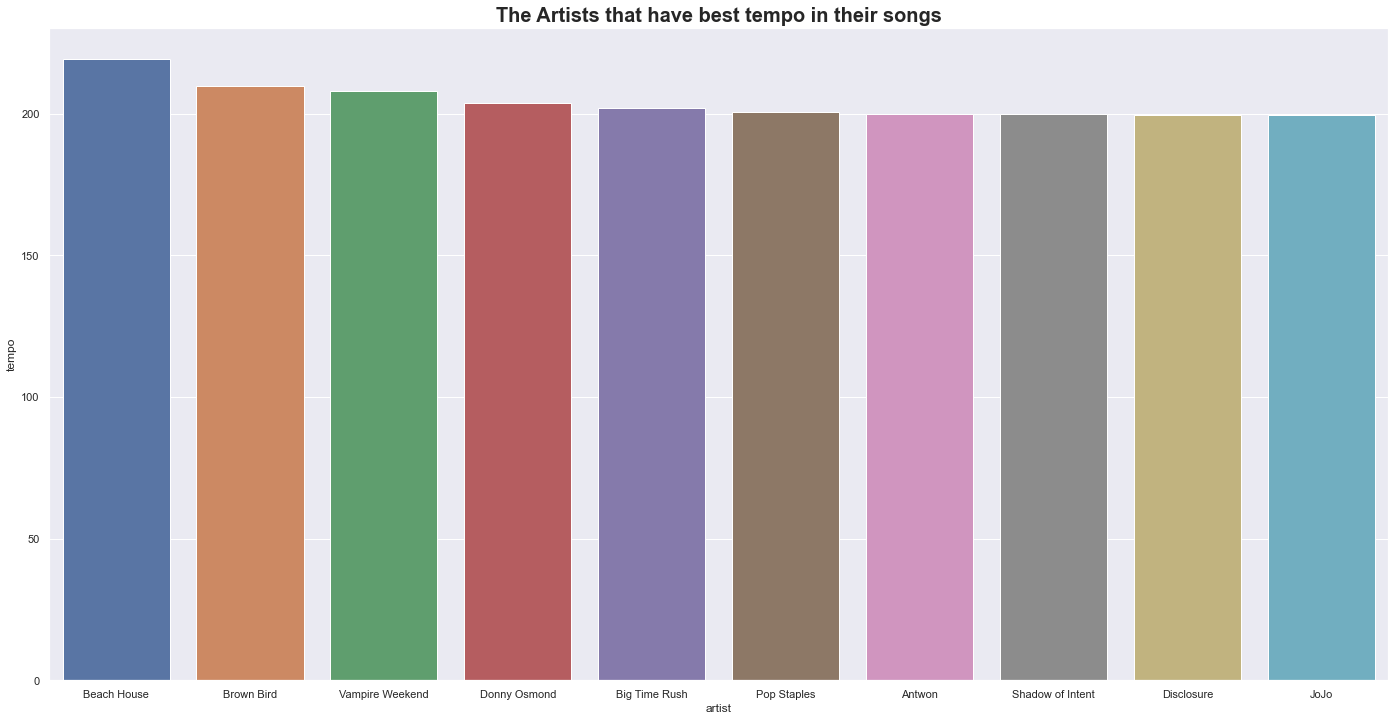

In [25]:
plt.figure(figsize=(24,12));
sns.barplot(top_10_tempo["artist"],top_10_tempo["tempo"]);
plt.title("The Artists that have best tempo in their songs",fontsize=20,fontweight="bold");

## Data Preprocessing

In [26]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,Parallel Lines,Junior Boys


In [27]:
df_clustering=df.drop(["song_title","artist"],axis=1)
df_clustering

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.01020,0.833,204600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286
1,0.19900,0.743,326933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588
2,0.03440,0.838,185707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173
3,0.60400,0.494,199413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230
4,0.18000,0.678,392893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904
...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,0.1290,-3.501,0.3330,74.976,0.211
2013,0.08770,0.894,182182,0.892,0.001670,0.0528,-2.663,0.1310,110.041,0.867
2014,0.00857,0.637,207200,0.935,0.003990,0.2140,-2.467,0.1070,150.082,0.470
2015,0.00164,0.557,185600,0.992,0.677000,0.0913,-2.735,0.1330,150.011,0.623


In [28]:
df_clustering["duration_ms"]=df_clustering["duration_ms"].apply(lambda x : x/1000)

In [29]:
df_clustering.rename({"duration_ms":"duration_sec"},axis=1,inplace=True)

In [30]:
df_clustering.head()

,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0102,0.833,204.600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286
1,0.1990,0.743,326.933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588
2,0.0344,0.838,185.707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173
3,0.6040,0.494,199.413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230
4,0.1800,0.678,392.893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904


## Scaling the data 

In [31]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler

In [32]:
scaler=MinMaxScaler()
df_clustering_scaled=scaler.fit_transform(df_clustering)
df_clustering_scaled=pd.DataFrame(df_clustering_scaled)
df_clustering_scaled.columns=df_clustering.columns
df_clustering_scaled.head()

,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.153862,0.741141,0.514441,0.596033,0.262432
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.124395,0.692162,0.071005,0.654474,0.577936
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.147548,0.791369,0.335351,0.158539,0.144379
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.077247,0.544709,0.003784,0.225162,0.203928
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.442223,0.654132,0.058393,0.735659,0.908065


## Elbow Method to find the best value of K

In [33]:
wcss=[]

for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(df_clustering_scaled)
    wcss.append(k_means.inertia_)
wcss

[761.6923978099168,
 596.9229212766334,
 487.25217772596494,
 408.66303027889813,
 367.7687479195448,
 342.55015626860757,
 324.0950171701081,
 306.3832697791731,
 293.636466998299,
 281.89757670137607]

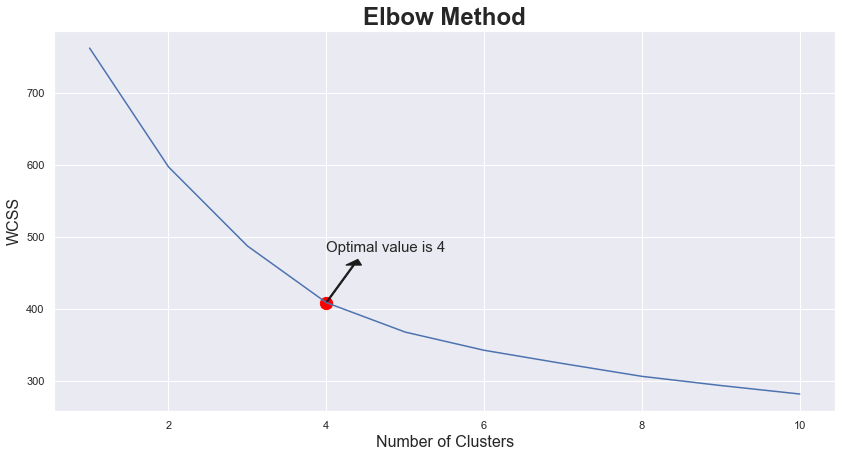

In [34]:
plt.figure(figsize=(14,7));
plt.plot(range(1,11),wcss);
plt.title("Elbow Method",fontweight="bold",fontsize=24);
plt.xlabel("Number of Clusters",fontsize=16,fontfamily="Sans");
plt.ylabel("WCSS",fontsize=16,fontfamily="Sans");
plt.scatter(4,wcss[3],s=150,color="red");
plt.arrow(4,wcss[3],0.4,60,color="k",length_includes_head=True,width=0.02,head_width=0.2,head_length=8)
plt.annotate("Optimal value is 4",(4,480),fontsize=15,fontfamily="Sans");

In [35]:
df_clustering_scaled=df_clustering_scaled.values

k_means=KMeans(n_clusters=4,init="k-means++",max_iter=300,random_state=42)
y_pred=k_means.fit_predict(df_clustering_scaled)

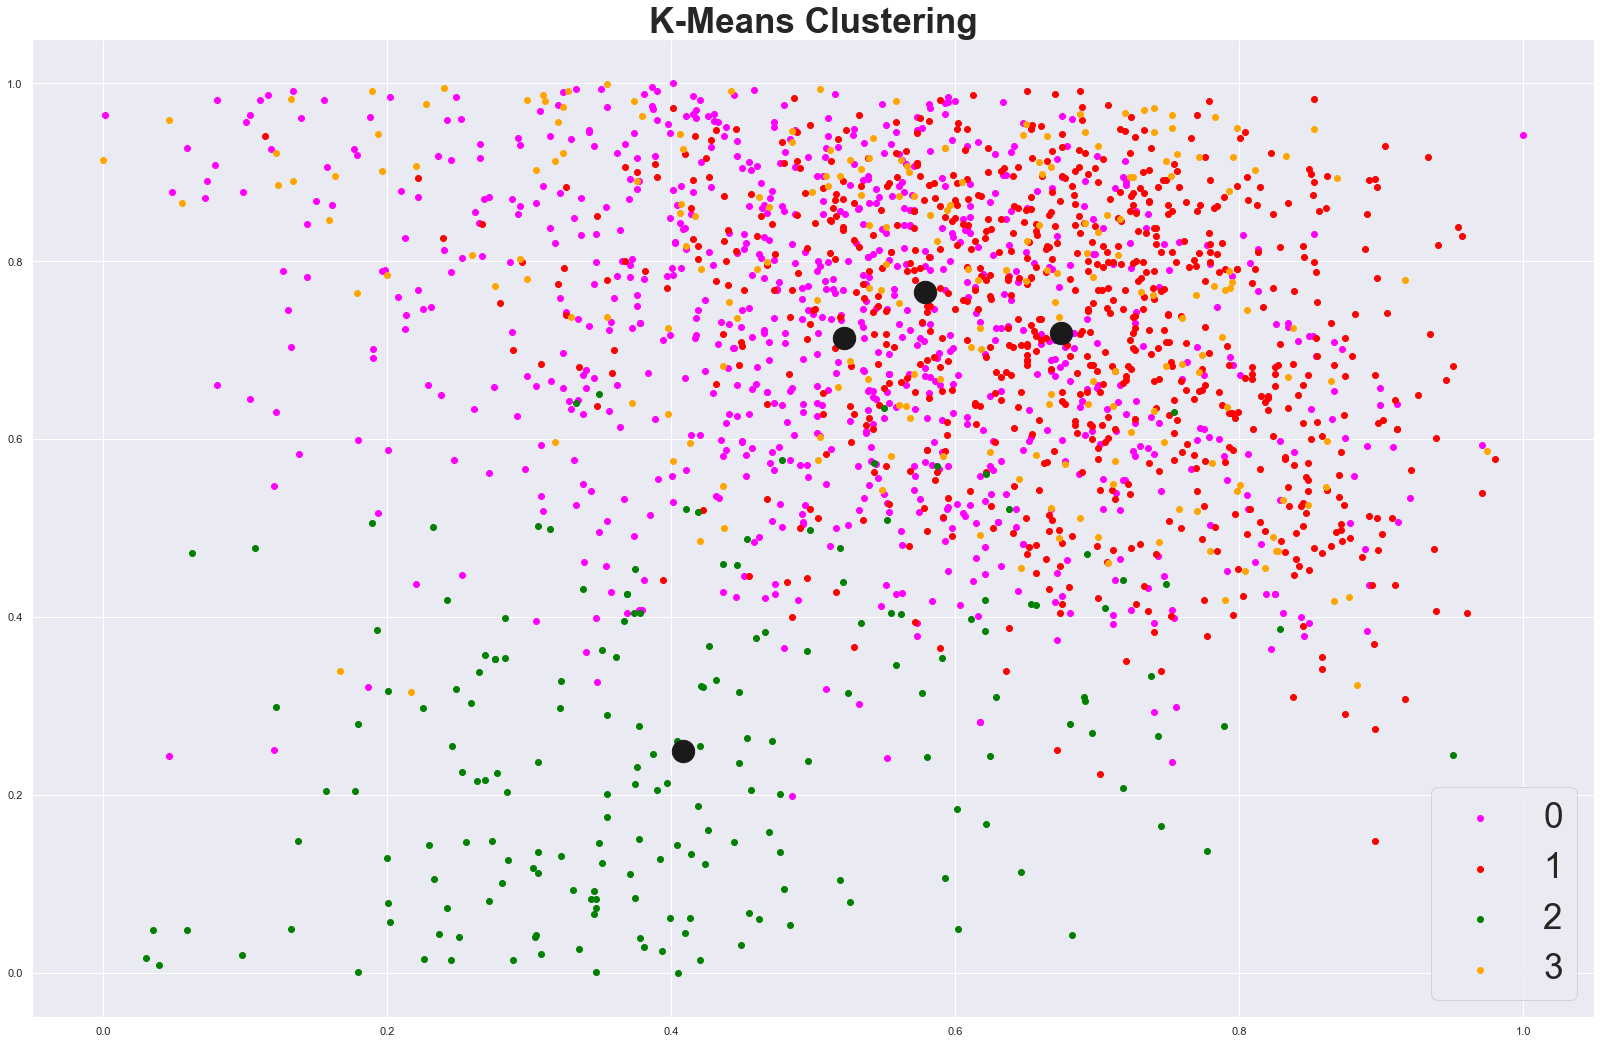

In [36]:
plt.figure(figsize=(28,18))

plt.scatter(df_clustering_scaled[y_pred==0,1],df_clustering_scaled[y_pred==0,3],label=0,c="magenta");
plt.scatter(df_clustering_scaled[y_pred==1,1],df_clustering_scaled[y_pred==1,3],label=1,c="red");
plt.scatter(df_clustering_scaled[y_pred==2,1],df_clustering_scaled[y_pred==2,3],label=2,c="green");
plt.scatter(df_clustering_scaled[y_pred==3,1],df_clustering_scaled[y_pred==3,3],label=3,c="orange");
plt.scatter(k_means.cluster_centers_[:,1],k_means.cluster_centers_[:,3],s=500,c="k");
plt.title("K-Means Clustering",fontsize=35,fontweight="bold");
plt.legend(prop={'size': 35});


## KNN Classifier

We applied the K-Means algorithm.To verify the accuracy of the clustering,we can apply the KNN Classifier and get the accuracy score.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [38]:
x1=pd.DataFrame(df_clustering_scaled)
x1.columns=df.columns[:10]
y1=y_pred

In [39]:
x1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.153862,0.741141,0.514441,0.596033,0.262432
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.124395,0.692162,0.071005,0.654474,0.577936
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.147548,0.791369,0.335351,0.158539,0.144379
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.077247,0.544709,0.003784,0.225162,0.203928
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.442223,0.654132,0.058393,0.735659,0.908065
...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.115976,0.902592,0.390844,0.158142,0.184079
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.035782,0.928149,0.136083,0.362636,0.869411
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.205430,0.934126,0.105814,0.596150,0.454659
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.076300,0.925953,0.138605,0.595736,0.614501


In [40]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

In [41]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
y_pred_knn=knn.predict(x1_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
accuracy_score(y1_test,y_pred_knn)

0.9381188118811881

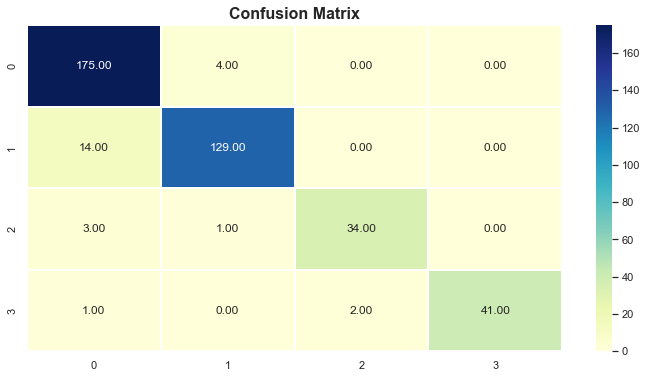

In [45]:
plt.figure(figsize=(12,6));
sns.heatmap(confusion_matrix(y1_test,y_pred_knn),cmap="YlGnBu",linewidths=2,annot=True,fmt=".2f");
plt.title("Confusion Matrix",fontsize=16,fontweight="bold");